# Scikit Learn notes

Scikit learn assumes that input is a 2D array and output/labels is a 1D/2D array. One sample is a row in the 2D array. One feature is a column in the 2D array.

### Basic APIs

estimator.fit(X,[y])

- estimator.predict -> Classification, Regression, Clustering
- estimator.transform -> Preprocessing, Dimensionality reduction, Feature selection, Feature extraction

### Model selection & Model complexity

Training accuracy keeps increasing as model is made more and more complex. However, generalization accuracy increase to a maximum and then drops back due to overfitting. The sweet spot is where the generalization accuracy is max. Before that is an underfit model, above that is an overfit model.

#### 1. Cross Validation

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

In [222]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

scores = cross_val_score(SVC(),x,y,cv=5)
print(scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


You can use the shuffle split to break the data the way you want, using ShuffleSplit. This is different from the normal, and is present in the sklearn.cross_validation API.

http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.cross_validation.ShuffleSplit.html

#### 2. Data Splitting

In [223]:
from sklearn.model_selection import ShuffleSplit

In [224]:
cv_ss = ShuffleSplit(n_splits=10,train_size=0.9,test_size=0.1)
scores_ss = cross_val_score(SVC(),x,y,cv = cv_ss)
print(scores_ss)

[1.         1.         1.         1.         1.         1.
 0.93333333 0.93333333 0.93333333 1.        ]


In [225]:
from sklearn.model_selection import StratifiedKFold

In [226]:
cv_labels = StratifiedKFold(n_splits=3)
scores_strat = cross_val_score(SVC(),x,y,cv = cv_labels)
print(scores_strat)

[0.98039216 0.96078431 0.97916667]


#### 3. Grid Search

- Its important to split the data into test and train first, even before applying cross validation.
- The Splits are used to train models for each Fold, but they are also tested against test set for evaluation.
- This is then used to estimate the right parameters.

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [229]:
param_grid = {'C' : 10.**np.arange(-2,2),'gamma' : 10.**np.arange(-2,2)}
param_grid

{'C': array([ 0.01,  0.1 ,  1.  , 10.  ]),
 'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])}

- The grid object takes in the estimator, crossvalidator and parameter grid
- It brute force computes each combination of parameter dict and then can be used like any other model to train data

In [230]:
grid = GridSearchCV(SVC(), cv=cv_labels, param_grid=param_grid)
grid.fit(x_train,y_train)
grid.predict(x_test)
pd.DataFrame(grid.grid_scores_)

/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{'C': 0.01, 'gamma': 0.01}",0.455357,"[0.34210526315789475, 0.34210526315789475, 0.6..."
1,"{'C': 0.01, 'gamma': 0.1}",0.455357,"[0.34210526315789475, 0.34210526315789475, 0.6..."
2,"{'C': 0.01, 'gamma': 1.0}",0.455357,"[0.34210526315789475, 0.34210526315789475, 0.6..."
3,"{'C': 0.01, 'gamma': 10.0}",0.428571,"[0.34210526315789475, 0.34210526315789475, 0.6..."
4,"{'C': 0.1, 'gamma': 0.01}",0.455357,"[0.34210526315789475, 0.34210526315789475, 0.6..."
5,"{'C': 0.1, 'gamma': 0.1}",0.866071,"[0.8157894736842105, 0.8421052631578947, 0.944..."
6,"{'C': 0.1, 'gamma': 1.0}",0.928571,"[0.8421052631578947, 1.0, 0.9444444444444444]"
7,"{'C': 0.1, 'gamma': 10.0}",0.437500,"[0.34210526315789475, 0.3684210526315789, 0.61..."
8,"{'C': 1.0, 'gamma': 0.01}",0.910714,"[0.8157894736842105, 0.9736842105263158, 0.944..."
9,"{'C': 1.0, 'gamma': 0.1}",0.937500,"[0.868421052631579, 1.0, 0.9444444444444444]"


In [231]:
grid.best_params_

{'C': 10.0, 'gamma': 0.1}

In [232]:
grid.score(x_test,y_test)

0.9473684210526315

#### 4. Bag of words representations

- You tokenize the words of each document using CountVectorizer / TfidfVectorizer
- You build a vocabulary over all the documents
- Then create a sparse matrix encoding of each document
- You can also use unigram, bigram etc to tokenize words

In [233]:
x = ["hi my name is akshay",
     "this is a good laptop",
     "i am quite hungry",
     "can we go to the mall ?",
     "i guess we will need more food",
     "isnt there a cab waiting ?",
     "i need to eat fast"]
y = [0,0,1,0,1,0,1]

In [234]:
from sklearn.feature_extraction.text import CountVectorizer

In [235]:
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_

{'hi': 10,
 'my': 17,
 'name': 18,
 'is': 12,
 'akshay': 0,
 'this': 23,
 'good': 8,
 'laptop': 14,
 'am': 1,
 'quite': 20,
 'hungry': 11,
 'can': 3,
 'we': 26,
 'go': 7,
 'to': 24,
 'the': 21,
 'mall': 15,
 'guess': 9,
 'will': 27,
 'need': 19,
 'more': 16,
 'food': 6,
 'isnt': 13,
 'there': 22,
 'cab': 2,
 'waiting': 25,
 'eat': 4,
 'fast': 5}

In [236]:
train_x = cv.transform(x)
train_x

<7x28 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [237]:
print(x[3],"-->",train_x[3].nonzero()[1])

can we go to the mall ? --> [ 3  7 15 21 24 26]


In [238]:
from sklearn.svm import LinearSVC

In [239]:
svm = LinearSVC()
svm.fit(train_x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [246]:
x[np.argmin(np.abs(svm.decision_function(x)))]

ValueError: Expected 2D array, got 1D array instead:
array=['hi my name is akshay' 'this is a good laptop' 'i am quite hungry'
 'can we go to the mall ?' 'i guess we will need more food'
 'isnt there a cab waiting ?' 'i need to eat fast'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Text classification

In [248]:
import pandas as pd
df = pd.read_csv("job_skills.csv")

In [249]:
import missingno as msno
df1 = df[df['Responsibilities'].notna()]

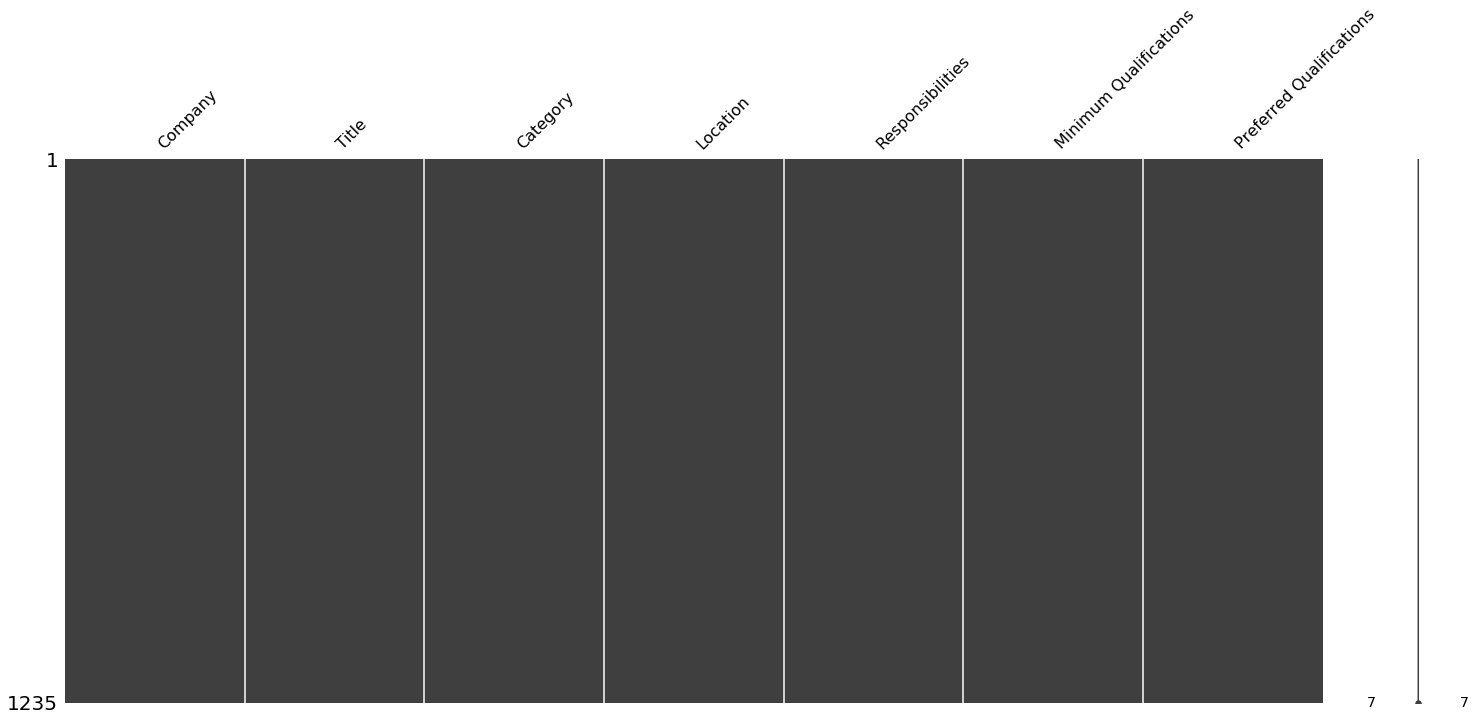

In [250]:
msno.matrix(df1)

In [251]:
df1.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [252]:
len(df1['Category'].unique())

23

In [253]:
x = df1[['Title','Responsibilities','Minimum Qualifications','Preferred Qualifications']]
y = df1['Category']

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=99)
print(len(x_train),len(x_test),len(y_train),len(y_test))

926 309 926 309


In [255]:
print(len(y_train.unique()),len(y_test.unique()))

23 23


In [256]:
x_train

,Title,Responsibilities,Minimum Qualifications,Preferred Qualifications
53,"Solutions Engineer, Google Cloud Healthcare an...",Work with the team to identify and qualify bus...,BA/BS degree in Computer Science or related so...,"Master's degree in Computer Science, Biomedica..."
982,"MBA Intern, Summer 2018",Google interns are given a lot of responsibili...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
1211,People Consultant Pod Manager,"Challenge, motivate and inspire the People Con...",BA/BS degree or equivalent practical experienc...,Demonstrated experience with cross-functional ...
1129,"Policy Specialist, Extended Workforce Solutions",Consult as a subject matter expert around cont...,BA/BS degree or equivalent practical experienc...,MA/MS Degree or JD.\nExperience with cultural ...
76,"Technical Solutions Consultant, Google Technic...","Work closely with our Sales team. Identify, de...",BA/BS degree in Computer Science or a related ...,Familiarity with SQL/MySQL and Unix/Linux oper...
471,"Global Partnerships Solutions Manager, Telecom",Work with head of Telco Partnerships Solutions...,BA/BS degree or equivalent practical experienc...,"Passion for, and experience in, the Telco indu..."
47,"Technical Writer, University Graduate",Write technical documentation for our external...,BA/BS degree or equivalent practical experienc...,Graduating from BA/BS degree or MA/MS degree i...
205,Strategic Cloud DevOps and Infrastructure Engi...,Consult with customers on technical issues bas...,BS degree in a technical or engineering field ...,Be a trusted technical advisor to customers an...
598,Enterprise Customer Development Representative...,Contribute to account/territory strategy by pe...,BA/BS degree or equivalent practical experienc...,"Experience or internship in sales, customer su..."
542,"Head of India Inside Sales, Google Cloud",Lead a team of managers and their teams in Ind...,BA/BS degree or equivalent practical experienc...,MBA or Master's degree in Computer Science or ...


In [257]:
from sklearn.base import BaseEstimator, TransformerMixin

class Concatenator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return list(X.apply(lambda x : ' '.join(x),axis=1))
    
concat = Concatenator()

In [258]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

from sklearn.svm import LinearSVC
svm = LinearSVC()

In [259]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(concat,cv,svm)

In [260]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('concatenator', Concatenator()), ('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), prep...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [261]:
pipe.score(x_test,y_test)

0.8025889967637541

In [262]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'linearsvc__C':np.logspace(-3,-1,5),
             'countvectorizer__ngram_range':[(1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)

In [263]:
grid.fit(x_train,y_train)

/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('concatenator', Concatenator()), ('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), prep...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'linearsvc__C': array([0.001  , 0.00316, 0.01   , 0.03162, 0.1    ]), 'countvectorizer__ngram_range': [(1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [264]:
grid.best_params_

{'countvectorizer__ngram_range': (1, 3), 'linearsvc__C': 0.03162277660168379}

In [265]:
grid.score(x_test,y_test)

0.8414239482200647

In [266]:
y_pred = grid.predict(x_test)

In [267]:
grid.classes_

array(['Administrative', 'Business Strategy', 'Data Center & Network',
       'Developer Relations', 'Finance', 'Hardware Engineering',
       'IT & Data Management', 'Legal & Government Relations',
       'Manufacturing & Supply Chain', 'Marketing & Communications',
       'Network Engineering', 'Partnerships', 'People Operations',
       'Product & Customer Support', 'Program Management',
       'Real Estate & Workplace Services', 'Sales & Account Management',
       'Sales Operations', 'Software Engineering',
       'Technical Infrastructure', 'Technical Solutions',
       'Technical Writing', 'User Experience & Design'], dtype=object)

In [268]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_pred,y_test).shape
cm = pd.DataFrame(confusion_matrix(y_pred,y_test),columns=grid.classes_)
cm.set_index(grid.classes_)

,Administrative,Business Strategy,Data Center & Network,Developer Relations,Finance,Hardware Engineering,IT & Data Management,Legal & Government Relations,Manufacturing & Supply Chain,Marketing & Communications,...,Product & Customer Support,Program Management,Real Estate & Workplace Services,Sales & Account Management,Sales Operations,Software Engineering,Technical Infrastructure,Technical Solutions,Technical Writing,User Experience & Design
Administrative,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Business Strategy,0,20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Data Center & Network,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Developer Relations,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Finance,0,0,0,0,25,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Hardware Engineering,0,0,1,0,0,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
IT & Data Management,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Legal & Government Relations,0,0,0,0,0,0,0,16,0,1,...,0,0,0,0,0,0,0,0,0,0
Manufacturing & Supply Chain,0,0,0,0,1,1,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
Marketing & Communications,0,1,0,0,0,0,0,0,0,40,...,0,0,1,2,0,0,0,0,0,0


In [269]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('concatenator', Concatenator()), ('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), prep...    max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0))])

In [270]:
z = pd.DataFrame({"Responsibilities":["Making product specifications and developing products"],"Minimum Qualifications":["BTech Engineering"],"Preferred Qualifications":["Experienced in multiple large scale product specs"]})
#
z

,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Making product specifications and developing p...,BTech Engineering,Experienced in multiple large scale product specs


In [271]:
grid.predict(z)

array(['Program Management'], dtype=object)

In [309]:
grid.decision_function(x_test)

array([[-2.69390406, -2.45681927, -2.83265079, ..., -2.69068881,
        -3.02069231, -2.44971661],
       [-1.52238338, -1.76239497, -1.76440129, ...,  0.9644864 ,
        -1.68607345, -1.48684455],
       [-1.39319089, -1.48942171, -1.47941515, ..., -1.48902764,
        -1.41266997,  0.98331234],
       ...,
       [-1.62886203, -1.79924093, -1.73882401, ...,  0.98997138,
        -1.71851076, -1.59633098],
       [-1.00550789, -1.23851421, -1.12481594, ..., -0.98172362,
        -1.06711116, -0.99712817],
       [-1.15957385, -1.18007483, -1.09489514, ..., -1.02482677,
        -1.09287068, -1.14976468]])

In [308]:
x_train.ix[[np.argmin(i) for i in np.abs(grid.decision_function(x_train)).T]]

/Users/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Title,Responsibilities,Minimum Qualifications,Preferred Qualifications
565,"Associate Account Strategist (Romanian), Googl...",Implement creative ways to improve our custome...,Bachelor's degree or equivalent practical expe...,Experience with leading and motivating.\nExper...
793,User Experience Researcher,Conduct independent research on multiple aspec...,"BA/BS degree in Anthropology, Human Factors, P...",M.S./M.A. or Ph.D. in a related field combined...
772,"Business Intern 2018, Argentina",Google interns are given a lot of responsibili...,Be currently enrolled in any major at a univer...,Interest in the Internet and Google's technolo...
772,"Business Intern 2018, Argentina",Google interns are given a lot of responsibili...,Be currently enrolled in any major at a univer...,Interest in the Internet and Google's technolo...
706,"Retail Strategy Lead, Retail Marketing","Identify and prioritize opportunities, as well...",BA/BS degree or equivalent practical experienc...,Leadership experience developing business plan...
598,Enterprise Customer Development Representative...,Contribute to account/territory strategy by pe...,BA/BS degree or equivalent practical experienc...,"Experience or internship in sales, customer su..."
772,"Business Intern 2018, Argentina",Google interns are given a lot of responsibili...,Be currently enrolled in any major at a univer...,Interest in the Internet and Google's technolo...
126,"Technical Writer, University Graduate",Write technical documentation for our external...,BA/BS degree or equivalent practical experienc...,Graduating from BA/BS degree or MA/MS degree i...
772,"Business Intern 2018, Argentina",Google interns are given a lot of responsibili...,Be currently enrolled in any major at a univer...,Interest in the Internet and Google's technolo...
462,NaN,NaN,NaN,NaN


In [217]:
len(grid.decision_function(x_test))

309

# Online model using gridsearchcv

In [103]:
!pip install faker

    100% |████████████████████████████████| 757kB 497kB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 523kB/s ta 0:00:01


In [106]:
from faker import Faker
fake = Faker()

In [108]:
n = 1000

In [110]:
df = pd.DataFrame({'Client_name':[fake.name() for i in range(n)],
                   'location_add':[fake.address() for i in range(n)]},'firstname')
df.head()

,Client_name,location_add
0,Taylor Orr,21628 Edwards Groves Suite 644\nAtkinsoncheste...
1,Luis Thomas,"79192 Adam Wells Apt. 282\nSamanthachester, HI..."
2,Susan Green,"9185 Steve Crossing\nSouth Amber, KY 40747-6885"
3,Jonathan Miller,"553 Moss Curve\nEast Eric, OK 94402-7036"
4,Kelly Holmes,"428 Holly Spurs Suite 766\nDelgadoborough, KS ..."
